<a href="https://colab.research.google.com/github/byeonguklee/Python/blob/main/%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
print(keras.__version__) # 패키지 버전 정보 찾기 (로딩이 잘 되었는지 확인)

2.9.0


In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #상위 만개의 데이터만 사용

In [4]:
train_data.shape

(25000,)

In [5]:
# train_data[0]

In [6]:
train_labels[0] # 긍정적

1

In [7]:
# 문장으로 복원해보기
word_index = imdb.get_word_index()

#word_index.items() # 개별항목 표시

reverse_word_index = dict([value, key] for (key, value) in word_index.items())
# 개별항목으로 표시된 (key, value) 값을 value, key로 순서 변경
# 기존은 단어가 key 였지만 숫자인 value 값을 key로 만들기 위해

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
# ' '.join: 각 단어를 띄워줌
# 각 단어마다 i로 넘어가면 dict인 reverse_word_index에서 단어를 찾아냄
# -3의 경우 index의 0, 1, 2는 특수문자여서 음수로 만들어 주면서 찾을 수 없는 dict에 대해 ?로 표시되도록

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비

In [9]:
## enumerate의 이해 - index 번호를 만들어주는 함수

for i, c in enumerate(["A", "B", "C"], start = 1): # 1부터 시작
  print(i, c)

1 A
2 B
3 C


In [10]:
## enumerate의 이해 - 튜플로 저장

temp = enumerate(["A", "B", "C"])

print(next(temp))
print(next(temp))
print(next(temp))

(0, 'A')
(1, 'B')
(2, 'C')


In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): # dimension의 default 값 설정
  results = np.zeros((len(sequences), dimension)) 

  for i, sequence in enumerate(sequences): # enuerate로 문장 index를 생성
    results[i, sequence] = 1

  return results

# Data의 Encoding
X_train = vectorize_sequences(train_data) 
X_test = vectorize_sequences(test_data)
#sequence에 train_data/test_data인 25000개(행)의 문장, 10000개(열)의 단어만 가져오기

In [12]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [13]:
# float type으로 변환

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 신경망 구축
* 얼마나 많은 층을 쌓을 것인가?
* 각층에 얼마나 많은 유닛을 둘 것인가?

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 0 또는 1로만 표현되면 되기 때문에

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 검증데이터 구분

In [19]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 학습(Train)과 동시에 검증(Validation) 하기 위하여 학습 데이터를 구분
# 완성도가 높아짐

### 실험 진행

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.5230 - accuracy: 0.7899 - val_loss: 0.4009 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3127 - accuracy: 0.9018 - val_loss: 0.3069 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2202 - accuracy: 0.9276 - val_loss: 0.2850 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1692 - accuracy: 0.9445 - val_loss: 0.3160 - val_accuracy: 0.8718
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1384 - accuracy: 0.9550 - val_loss: 0.2857 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1143 - accuracy: 0.9645 - val_loss: 0.3109 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0978 - accuracy: 0.9701 - val_loss: 0.3369 - val_accuracy: 0.8751
Epoch 8/20
30

### 실험 결과 데이터 가져오기

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

### 실험 결과 시각화

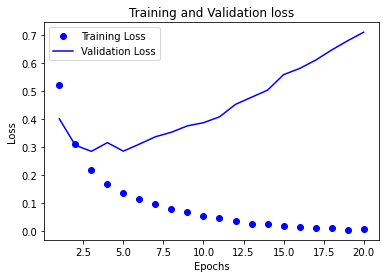

In [30]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label = 'Training Loss') # 학습에 따른 손실 값
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss') # 검증 데이터의 손실 값
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

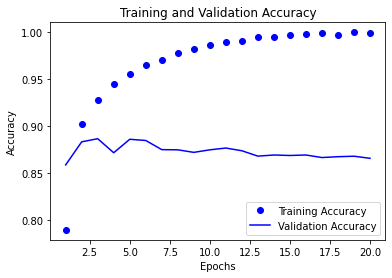

In [34]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy') # 학습에 따른 정확도
plt.plot(epochs, val_acc, 'b-', label = 'Validation Accuracy') # 검증 데이터의 정확도
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [35]:
new_model = models.Sequential()
new_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
new_model.add(layers.Dense(16, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
new_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
history = new_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,  # 검증 값이 
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 3s 53ms/step - loss: 0.5075 - accuracy: 0.7831 - val_loss: 0.3789 - val_accuracy: 0.8701
Epoch 2/3
30/30 [==============================] - 1s 38ms/step - loss: 0.3019 - accuracy: 0.9045 - val_loss: 0.3136 - val_accuracy: 0.8805
Epoch 3/3
30/30 [==============================] - 1s 38ms/step - loss: 0.2219 - accuracy: 0.9291 - val_loss: 0.3059 - val_accuracy: 0.8776


In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

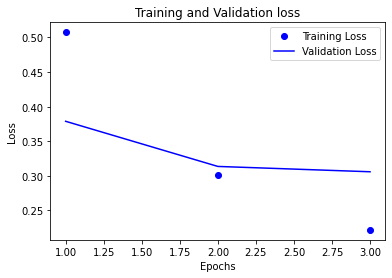

In [40]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss') # 학습에 따른 손실 값
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss') # 검증 데이터의 손실 값
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

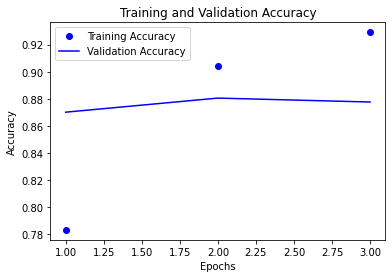

In [41]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy') # 학습에 따른 정확도
plt.plot(epochs, val_acc, 'b-', label = 'Validation Accuracy') # 검증 데이터의 정확도
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### tensorflow optimizer 이용

In [42]:
brand_new_model = models.Sequential()
brand_new_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
brand_new_model.add(layers.Dense(16, activation='relu'))
brand_new_model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
from tensorflow.keras import optimizers

brand_new_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
history = brand_new_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 75ms/step - loss: 0.5074 - accuracy: 0.7846 - val_loss: 0.3743 - val_accuracy: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2968 - accuracy: 0.9029 - val_loss: 0.2986 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2188 - accuracy: 0.9278 - val_loss: 0.2771 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1725 - accuracy: 0.9444 - val_loss: 0.2793 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1386 - accuracy: 0.9566 - val_loss: 0.2824 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1157 - accuracy: 0.9631 - val_loss: 0.3436 - val_accuracy: 0.8694
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0954 - accuracy: 0.9712 - val_loss: 0.3133 - val_accuracy: 0.8853
Epoch 8/20
30

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

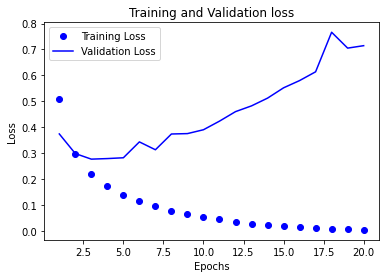

In [53]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss') # 학습에 따른 손실 값
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss') # 검증 데이터의 손실 값
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

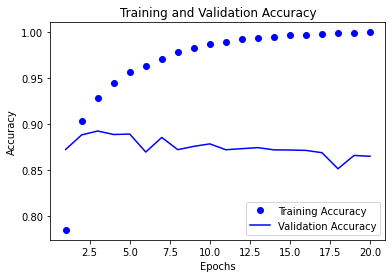

In [54]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy') # 학습에 따른 정확도
plt.plot(epochs, val_acc, 'b-', label = 'Validation Accuracy') # 검증 데이터의 정확도
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()